# Lab 06 Pogłos

Karol Działowski

## Przygotowanie plików

Wszystkie pliki (źródłowe i odpowiedzi impulsowej) sprowadzono do wspólnej częstotliwości próbkowania, tj. 44100 Hz za pomocą programu audacity. W przypadku plików `03--central-hall-university-york.wav` oraz `03--Chateau_de_Logne,_Outside.wav` usunięto nadmiarowe kanały tak aby sygnał miał tylko jeden kanał.

Pliki dźwiękowe:
- `wiki_bioinformatics.wav` - nazywany jako `dry_01`
- `york_drums.wav` - nazywany jako `dry_02`

Pliki z odpowiedziami impulsowymi:
- `01_Lexicon_480L/03--Brick_Wall.wav` - nazywany jako `ir_01`
- `02_IR_York/03--central-hall-university-york.wav` - nazywany jako `ir_02`
- `03_IMreverbs/03--Chateau_de_Logne,_Outside.wav` - nazywany jako `ir_03`


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.io import wavfile
from scipy import signal

import warnings
warnings.filterwarnings('ignore')

### Wczytanie plików dźwiękowych

In [2]:
dry_01, sr = librosa.load("./data/Dry/wiki_bioinformatics.wav", mono=True)
dry_01 = dry_01.astype('float32')

In [3]:
dry_02, sr = librosa.load("./data/Dry/york_drums.wav", mono=True)
dry_02 = dry_02.astype('float32')

### Wczytanie plików z odpowiedziami impulsowymi

In [4]:
ir_01, sr = librosa.load("./data/IRs/01_Lexicon_480L/03--Brick_Wall.wav", mono=True)
ir_01 = ir_01.astype('float32')

In [5]:
ir_02, sr = librosa.load("./data/IRs/02_IR_York/03--central-hall-university-york_cut_44100.wav", mono=True)
ir_02 = ir_02.astype('float32')

In [6]:
ir_03, sr = librosa.load("./data/IRs/03_IMreverbs/03--Chateau_de_Logne,_Outside_mono.wav", mono=True)
ir_03 = ir_03.astype('float32')

## Wyznaczanie dźwięków z pogłosem

Wyznaczenie dźwięku z pogłosem polega na filtracji sygnałów źródłowych danym filtrem. Np. po filtracji sygnału `dry_01` odpowiedziami `ir_03` powstanie plik `poglos_01_03`. Uzyskamy w taki sposób 6 plików z pogłosem. 

In [7]:
poglos_01_01 = signal.convolve(dry_01.astype('float32'), ir_01.astype('float32'), mode='same')
poglos_01_02 = signal.convolve(dry_01.astype('float32'), ir_02.astype('float32'), mode='same')
poglos_01_03 = signal.convolve(dry_01.astype('float32'), ir_03.astype('float32'), mode='same')

wavfile.write(f"./data/poglos_01_01.wav", sr, poglos_01_01)
wavfile.write(f"./data/poglos_01_02.wav", sr, poglos_01_02)
wavfile.write(f"./data/poglos_01_03.wav", sr, poglos_01_03)

In [8]:
poglos_02_01 = signal.convolve(dry_02.astype('float32'), ir_01.astype('float32'), mode='same')
poglos_02_02 = signal.convolve(dry_02.astype('float32'), ir_02.astype('float32'), mode='same')
poglos_02_03 = signal.convolve(dry_02.astype('float32'), ir_03.astype('float32'), mode='same')

wavfile.write(f"./data/poglos_02_01.wav", sr, poglos_02_01)
wavfile.write(f"./data/poglos_02_02.wav", sr, poglos_02_02)
wavfile.write(f"./data/poglos_02_03.wav", sr, poglos_02_03)

In [9]:
def spectogram(y, title):
    D = librosa.stft(y)  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title=title)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    return S_db

## Spektogramu dla pliku `dry_01`

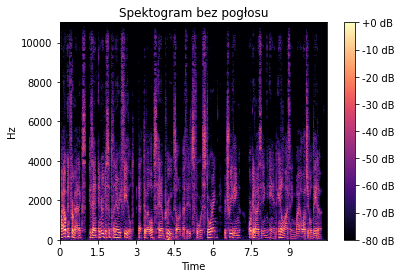

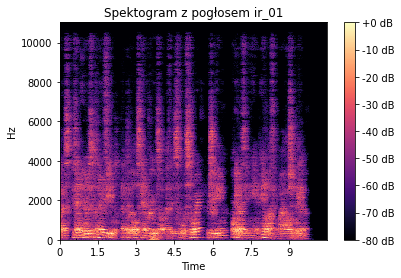

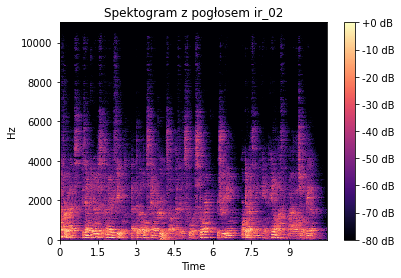

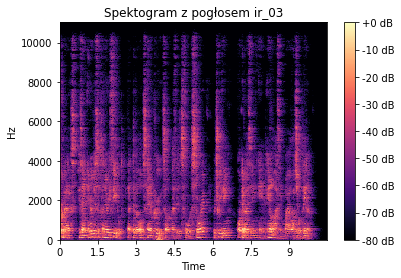

In [10]:
spec_dry_01 = spectogram(dry_01, "Spektogram bez pogłosu")
spec_poglos_01_01 = spectogram(poglos_01_01, "Spektogram z pogłosem ir_01")
spec_poglos_01_02 = spectogram(poglos_01_02, "Spektogram z pogłosem ir_02")
spec_poglos_01_03 = spectogram(poglos_01_03, "Spektogram z pogłosem ir_03")

## Spektogramu dla pliku `dry_02`

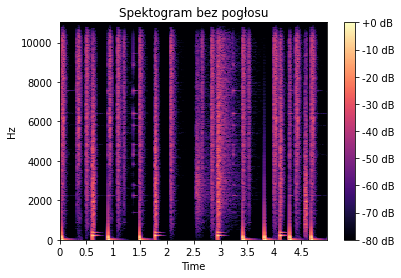

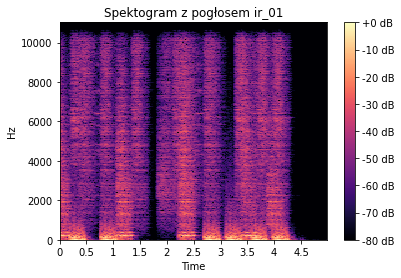

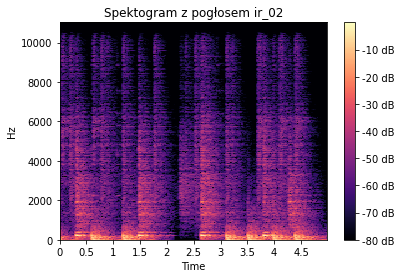

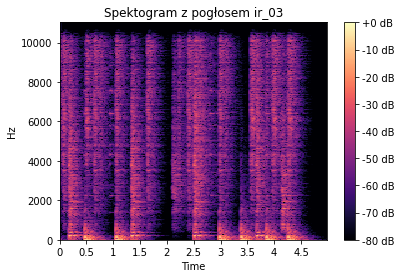

In [11]:
spec_dry_02 = spectogram(dry_02, "Spektogram bez pogłosu")
spec_poglos_02_01 = spectogram(poglos_02_01, "Spektogram z pogłosem ir_01")
spec_poglos_02_02 = spectogram(poglos_02_02, "Spektogram z pogłosem ir_02")
spec_poglos_02_03 = spectogram(poglos_02_03, "Spektogram z pogłosem ir_03")

## Porównanie spektogramów metryką MSE

Na początku porównano globalnie spektogramy za pomocą metryki MSE.

$$
M S E=\frac{1}{m n} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1}[I(i, j)-K(i, j)]^{2}
$$

In [40]:
def mse(spec_A, spec_B):
    """
    Wyliczanie metryki mse dla dwóch spektogramów
    """
    err = np.sum((spec_A.astype("float") - spec_B.astype("float")) ** 2)
    err = err/float(spec_A.shape[0] * spec_A.shape[1])
    return err

In [41]:
print("MSE poglos_01_01:", mse(spec_dry_01, spec_poglos_01_01))
print("MSE poglos_01_02:", mse(spec_dry_01, spec_poglos_01_02))
print("MSE poglos_01_03:", mse(spec_dry_01, spec_poglos_01_03))

MSE poglos_01_01: 292.53307149341117
MSE poglos_01_02: 201.2302528106089
MSE poglos_01_03: 273.4899881618881


In [42]:
print("MSE poglos_02_01:", mse(spec_dry_02, spec_poglos_02_01))
print("MSE poglos_02_02:", mse(spec_dry_02, spec_poglos_02_02))
print("MSE poglos_02_03:", mse(spec_dry_02, spec_poglos_02_03))

MSE poglos_02_01: 510.38889796902777
MSE poglos_02_02: 374.2178901821107
MSE poglos_02_03: 402.4074999376736


## Porównania spektogramów w pasmach oktawowych

Pojęcia oktawa używa także do określenia pasma częstotliwości, którego górna i dolna granica pozostają w stosunku 2:1; oktawę stanowią trzy kolejne tercje. W tym przypadku definiuje się trzy częstotliwości charakterystyczne dla pasma oktawy:
$f_{d}$ - częstotliwość dolna, $f_{o}$ - częstotliwość środkowa, $f_{g}$ - częstotliwość górna,
które pozostają w następujących zależnościach:

$$
\begin{array}{l}
\frac{f_{g}}{f_{d}}=\frac{2}{1} \\
f_{d}=f_{o} \cdot \sqrt[-2]{2} \\
f_{g}=f_{o} \cdot \sqrt[2]{2} \\
f_{o}=f_{d} \cdot \sqrt[2]{2}=f_{g} \cdot \sqrt[-2]{2}
\end{array}
$$

Źródło: https://www.wikiwand.com/pl/Oktawa_(akustyka)

In [65]:
def mse_in_octaves(spec_dry, spec_poglos):
    czestotliwosci_srodkowe = [16, 31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000]
    mse_pasma = []
    frequencies = librosa.fft_frequencies(sr=22050, n_fft=2048)
    for idx, f_o in enumerate(czestotliwosci_srodkowe):
        f_d = f_o * np.power(2, -1/2)
        f_g = f_o * np.power(2, 1/2)
        # print("Oktawa:", idx+1, "częstotliwość dolna:", f_d, "środkowa:", f_o, "górna:", f_g)
        lower_index = np.argmax(frequencies > f_d)
        if f_g > frequencies[-1]:
            upper_index = -1
        else:
            upper_index = np.argmax(frequencies >= f_g)
        spektogram_wzorca_w_pasmie = spec_dry[lower_index:upper_index, :]
        spektogram_w_pasmie = spec_poglos[lower_index:upper_index, :]
        current_mse = mse(spektogram_wzorca_w_pasmie, spektogram_w_pasmie)
        mse_pasma.append(current_mse)
        print(f"MSE oktawa {idx+1}:", current_mse)
    return mse_pasma

In [66]:
print("poglos_01_01")
print("=========================")
mse_poglos_01_01 = mse_in_octaves(spec_dry_01, spec_poglos_01_01)
print("=========================")

print("poglos_01_02")
print("=========================")
mse_poglos_01_02 = mse_in_octaves(spec_dry_01, spec_poglos_01_02)
print("=========================")

print("poglos_01_03")
print("=========================")
mse_poglos_01_03 = mse_in_octaves(spec_dry_01, spec_poglos_01_03)
print("=========================")

poglos_01_01
MSE oktawa 1: 239.4193097816552
MSE oktawa 2: 271.97008089530215
MSE oktawa 3: 262.6779550265939
MSE oktawa 4: 523.2495824384482
MSE oktawa 5: 617.4682355237511
MSE oktawa 6: 633.6293230759992
MSE oktawa 7: 414.7576950160585
MSE oktawa 8: 404.06471938068245
MSE oktawa 9: 382.47572473669294
MSE oktawa 10: 163.63069984861238
poglos_01_02
MSE oktawa 1: 433.6193875348354
MSE oktawa 2: 144.68840606211054
MSE oktawa 3: 207.38565249503927
MSE oktawa 4: 484.82201125361394
MSE oktawa 5: 581.6600732192281
MSE oktawa 6: 490.4605656025057
MSE oktawa 7: 332.94957521724905
MSE oktawa 8: 287.89630477923737
MSE oktawa 9: 247.8848196573605
MSE oktawa 10: 98.93882409600423
poglos_01_03
MSE oktawa 1: 228.28337984984685
MSE oktawa 2: 188.84195848502114
MSE oktawa 3: 228.2669862072982
MSE oktawa 4: 449.76419651865643
MSE oktawa 5: 480.0844902635372
MSE oktawa 6: 559.3194125912316
MSE oktawa 7: 347.03149786580406
MSE oktawa 8: 351.6791897766383
MSE oktawa 9: 359.36439338675285
MSE oktawa 10: 17

In [67]:
print("poglos_02_01")
print("=========================")
mse_poglos_02_01 = mse_in_octaves(spec_dry_02, spec_poglos_02_01)
print("=========================")

print("poglos_02_02")
print("=========================")
mse_poglos_02_02 = mse_in_octaves(spec_dry_02, spec_poglos_02_02)
print("=========================")

print("poglos_01_03")
print("=========================")
mse_poglos_02_03 = mse_in_octaves(spec_dry_02, spec_poglos_02_03)
print("=========================")

poglos_02_01
MSE oktawa 1: 1195.1380027648881
MSE oktawa 2: 1594.95000915628
MSE oktawa 3: 1501.7757953622297
MSE oktawa 4: 1627.3075094818657
MSE oktawa 5: 1508.3274704617752
MSE oktawa 6: 960.3584138238651
MSE oktawa 7: 642.9599501868978
MSE oktawa 8: 558.6618104391003
MSE oktawa 9: 492.2985825462577
MSE oktawa 10: 396.7565302320028
poglos_02_02
MSE oktawa 1: 513.0225146029402
MSE oktawa 2: 1036.260414971925
MSE oktawa 3: 946.0002204821037
MSE oktawa 4: 1591.8831520378833
MSE oktawa 5: 1352.311531321346
MSE oktawa 6: 752.2228985692873
MSE oktawa 7: 466.60653772332256
MSE oktawa 8: 367.45265679002
MSE oktawa 9: 312.64905631872216
MSE oktawa 10: 312.64621281037745
poglos_01_03
MSE oktawa 1: 995.5192962006811
MSE oktawa 2: 1011.1745258916849
MSE oktawa 3: 930.1366173937931
MSE oktawa 4: 1172.4434617165064
MSE oktawa 5: 980.5436981113212
MSE oktawa 6: 644.0064400816054
MSE oktawa 7: 415.30430138399646
MSE oktawa 8: 402.7649038105285
MSE oktawa 9: 396.4259646445222
MSE oktawa 10: 348.7766

In [83]:
def plot_octaves(mses):
    fig, axes = plt.subplots(1, len(mses), figsize=(12, 4))
    
    for idx, mse in enumerate(mses):
        axes[idx].bar(np.arange(10), mse)
        axes[idx].set_xticks(np.arange(10))
        axes[idx].set_xlabel("Oktawa")
        axes[idx].set_ylabel("MSE")
        axes[idx].set_title(f"Pogłos {idx+1}")
    plt.tight_layout()

### Dźwięk dry_01

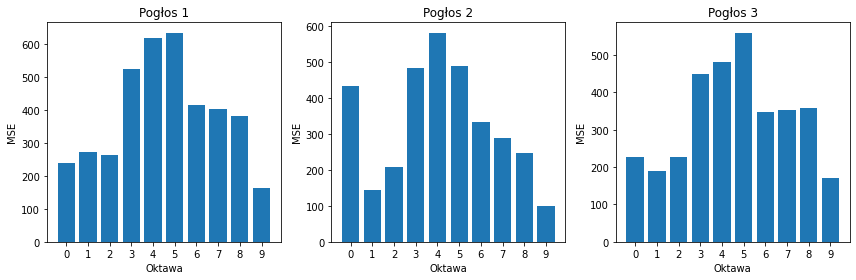

In [84]:
plot_octaves([mse_poglos_01_01, mse_poglos_01_02, mse_poglos_01_03])

### Dźwięk dry_02

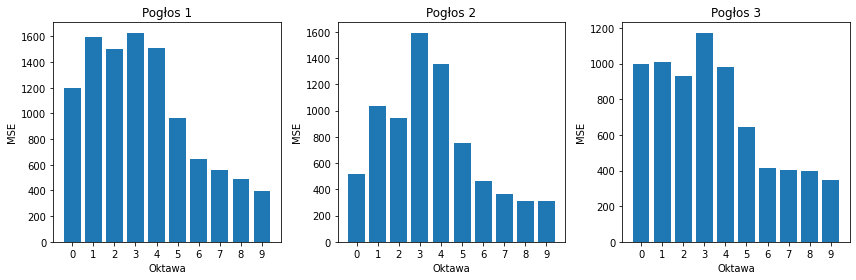

In [86]:
plot_octaves([mse_poglos_02_01, mse_poglos_02_02, mse_poglos_02_03])

## Wnioski

W ramach laboratorium zaimplementowane zostało nakładanie pogłosu na pliki dźwiękowe. Dla każdego pliku wejściowego (2 pliki) wygenerowano 3 pliki z pogłosem osiągając łącznie 6 sygnałów z wygenerowanym pogłosem. Dla każdego sygnału sporządzono spektogram. Spektogramy różnią się od siebie w zależności od zaaplikowanych filtrów. Na podstawie spektogramów można powiedzieć, że pogłos 1 i pogłos 3 zmieniały sygnał w całej dziedzinie częstotliwości, a pogłos 2 większość zmian wprowadzał dla częstotliwości $<6000Hz$.

Spektogramy porównano metryką MSE. Zaimplementowano też porównywanie spektogramów za pomocą metryki MSE w przedziałach oktawowych.